In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.getcwd() + '/data/data.csv'
df = pd.read_csv(filepath)

df[['gu', 'ro']] = df['Address'].str.split(' ', expand=True).iloc[:, :2]
df['Supply_type'] = df['Supply_type'].str.replace(r'\D', '', regex=True)
df['Qty'] = (3 - df['Cutline_rate']) * 10 + df['Cutline_score']

df.drop(
    columns=[
        'Address', 'Latitude', 'Longitude', 'Infra_score',
        'Cutline_rate', 'Cutline_score'
    ],
    inplace=True
)
numeric_df = df.select_dtypes(include=['number'])


## CORR

/tmp/ipykernel_15898/2732912465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


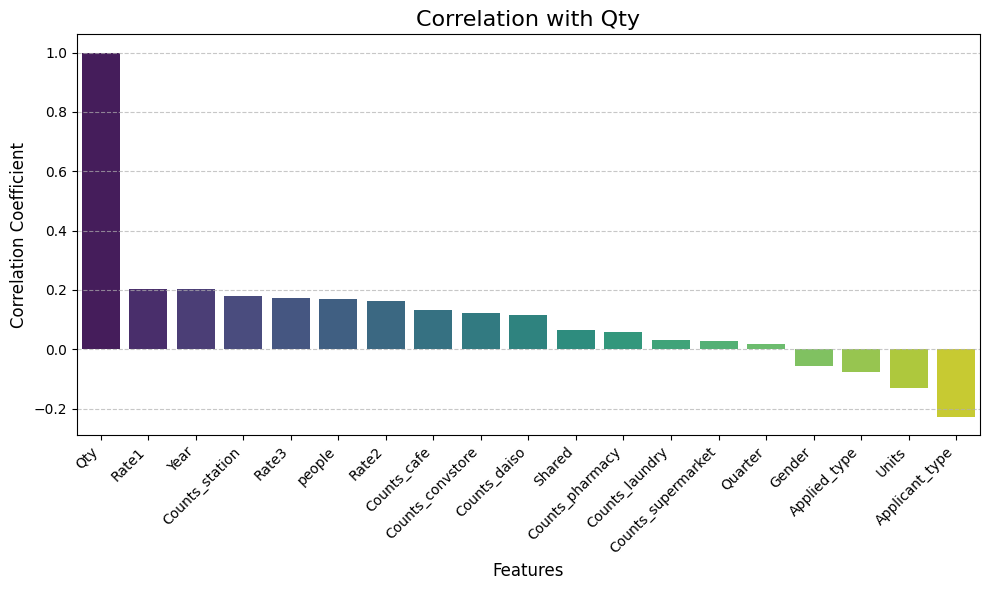

In [2]:
correlation_matrix = numeric_df.corr()
qty_correlation = correlation_matrix['Qty'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=qty_correlation.index,
    y=qty_correlation.values,
    palette=sns.color_palette("viridis", len(qty_correlation)),
    errorbar=None
)
plt.title("Correlation with Qty", fontsize=16)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

               Feature  Correlation       p-value
0       Applicant_type    -0.228379  7.899423e-12
1                Units    -0.129320  1.239475e-04
2               Gender    -0.056553  9.437516e-02
3               Shared     0.063133  6.179378e-02
4                 Year     0.201549  1.758761e-09
5              Quarter     0.017341  6.082616e-01
6         Applied_type    -0.077539  2.172647e-02
7         Counts_daiso     0.115465  6.169741e-04
8   Counts_supermarket     0.026547  4.326136e-01
9       Counts_laundry     0.030574  3.660876e-01
10     Counts_pharmacy     0.058207  8.510888e-02
11         Counts_cafe     0.131879  9.047854e-05
12    Counts_convstore     0.121822  3.015851e-04
13      Counts_station     0.180181  7.906172e-08
14              people     0.170852  3.638259e-07
15               Rate1     0.203978  1.109832e-09
16               Rate2     0.162309  1.371453e-06
17               Rate3     0.171774  3.139675e-07


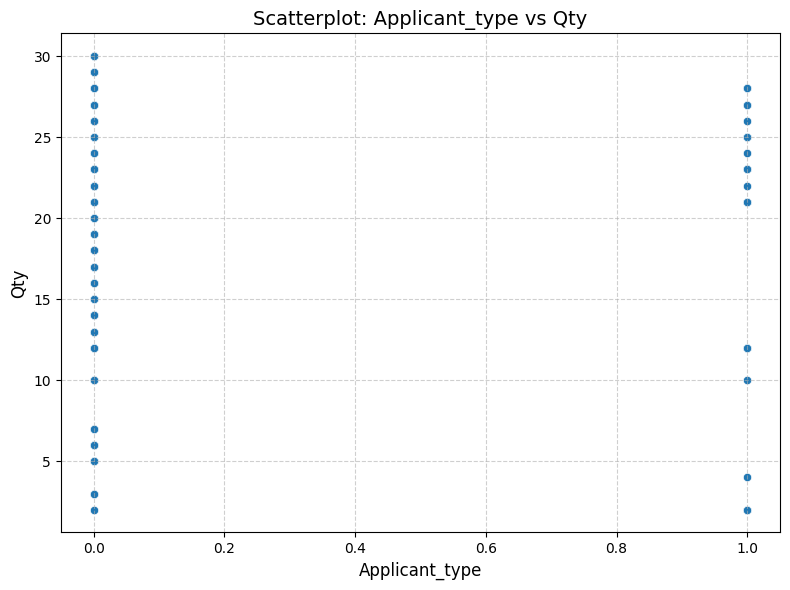

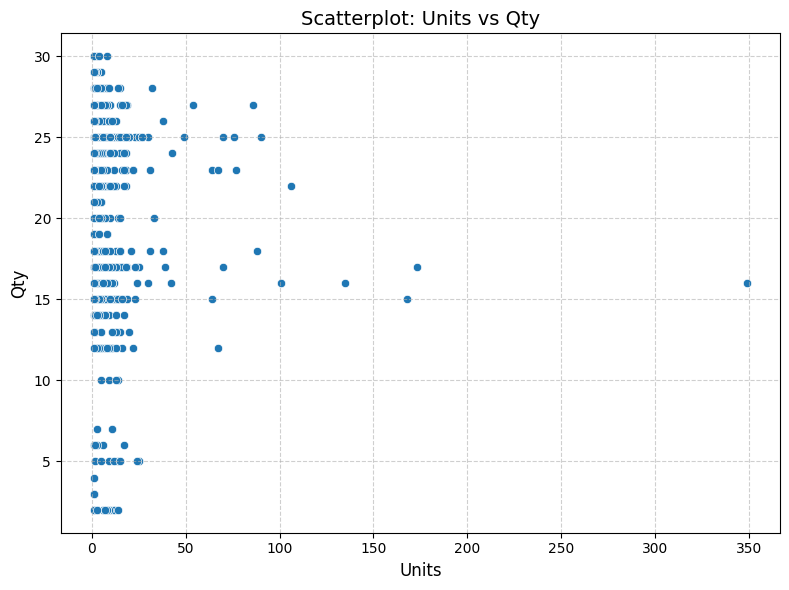

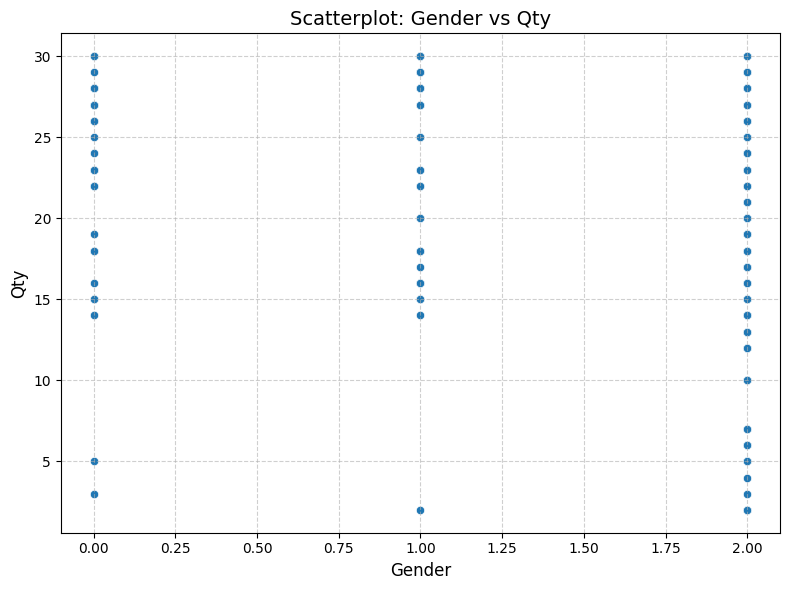

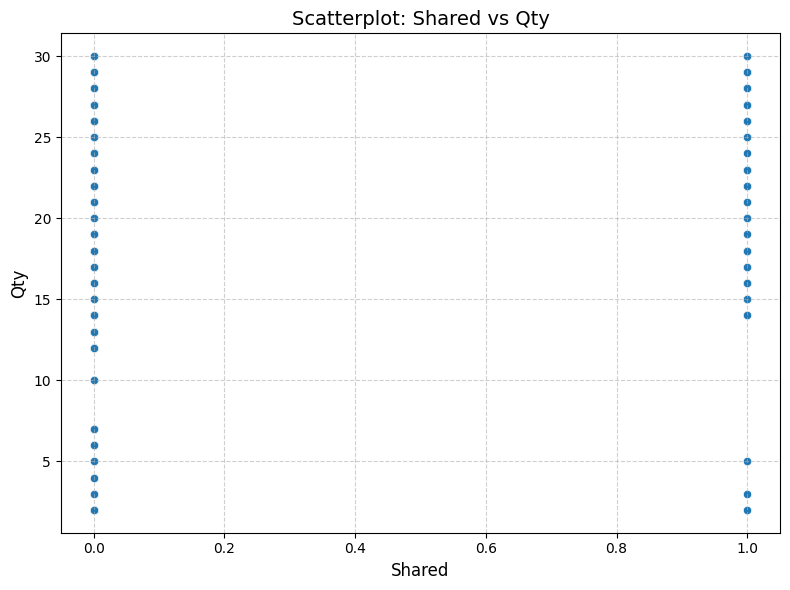

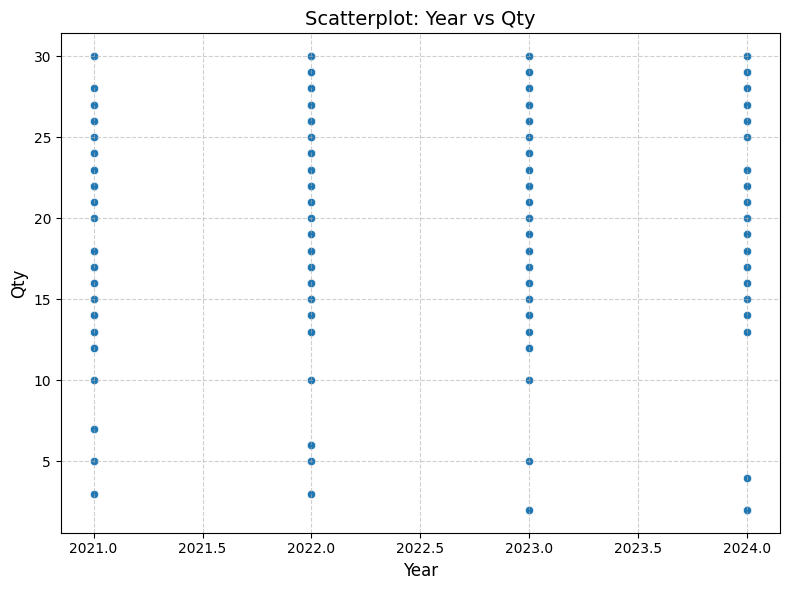

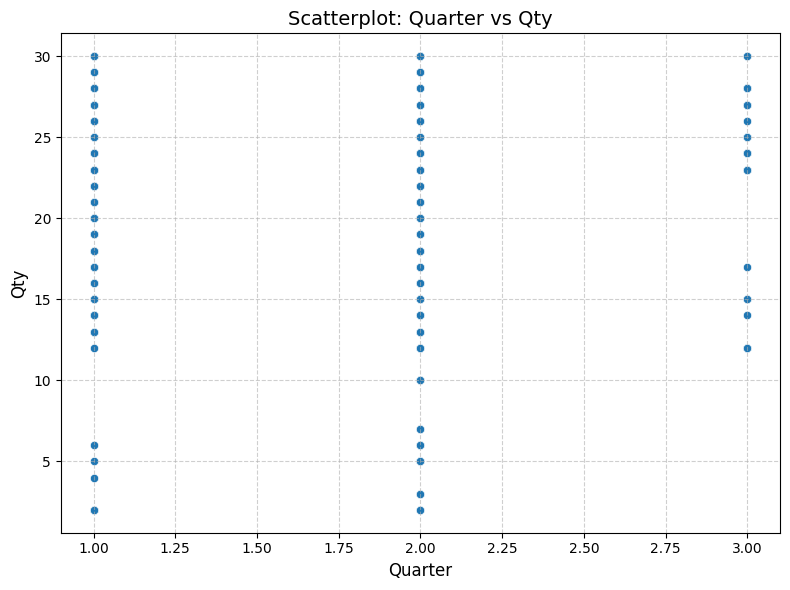

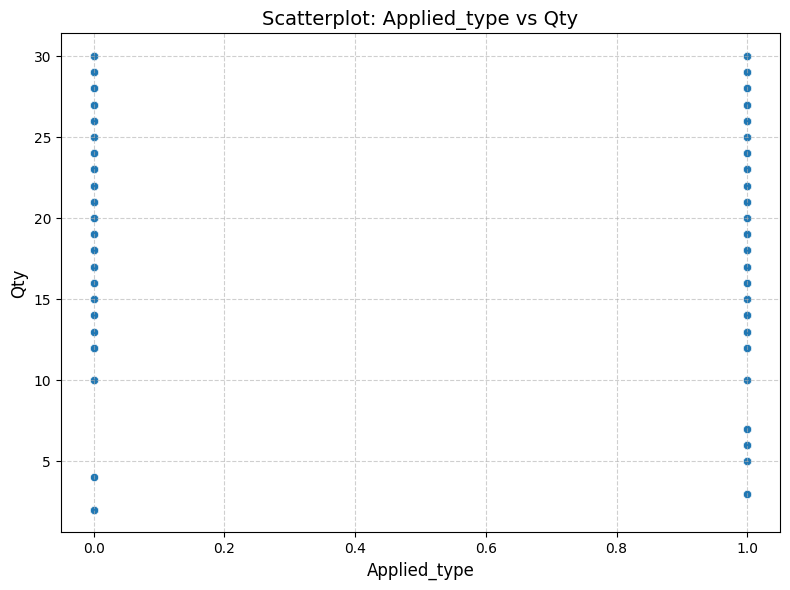

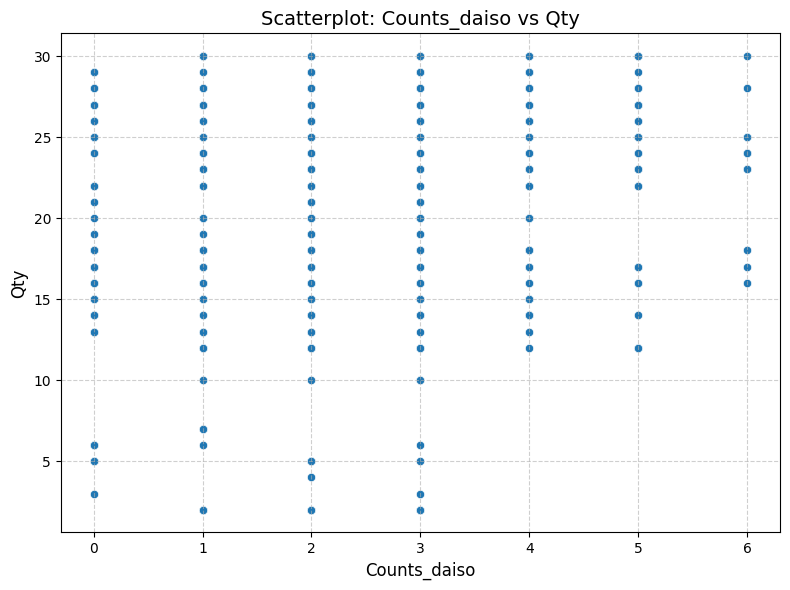

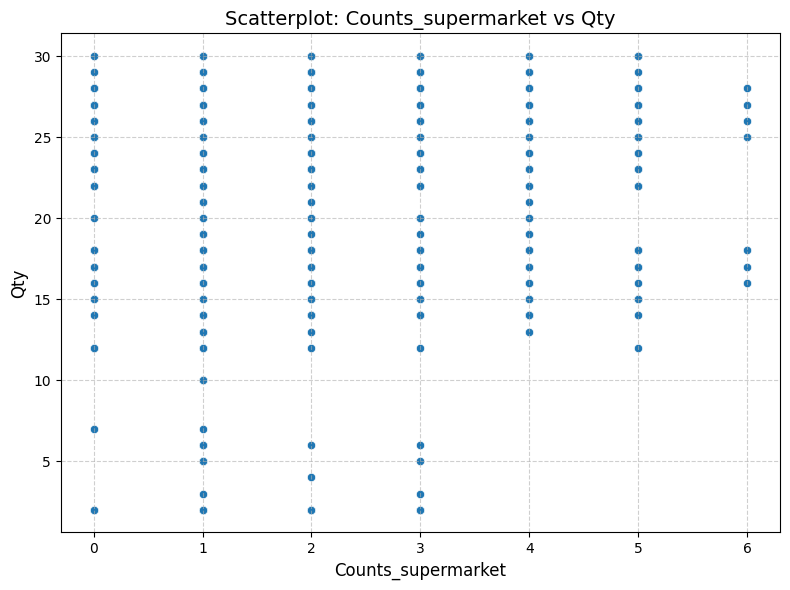

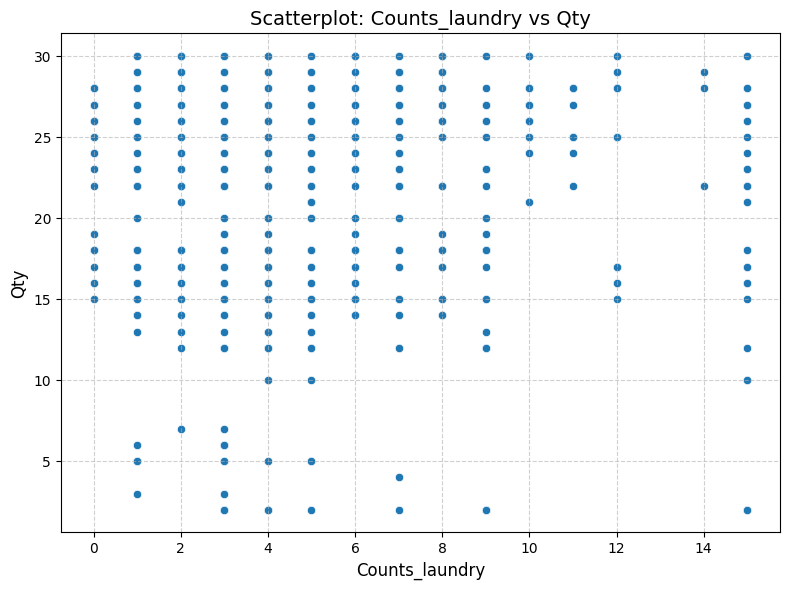

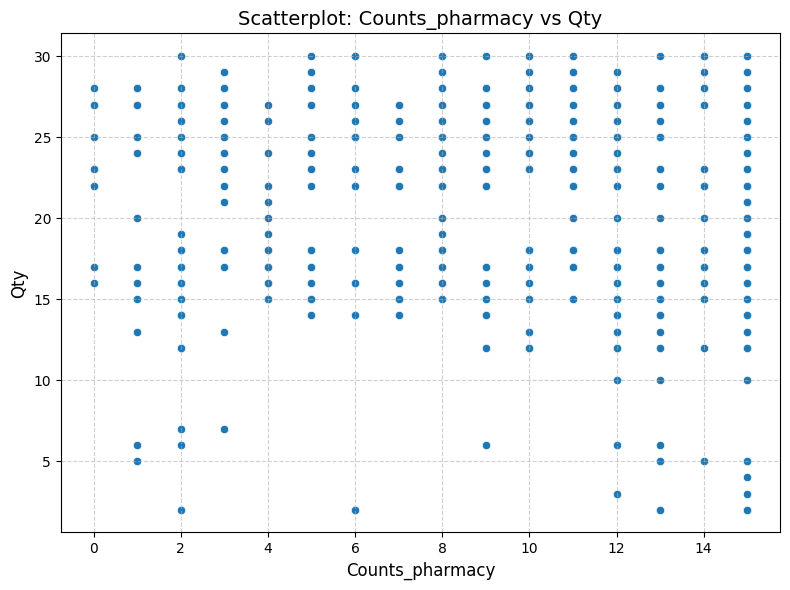

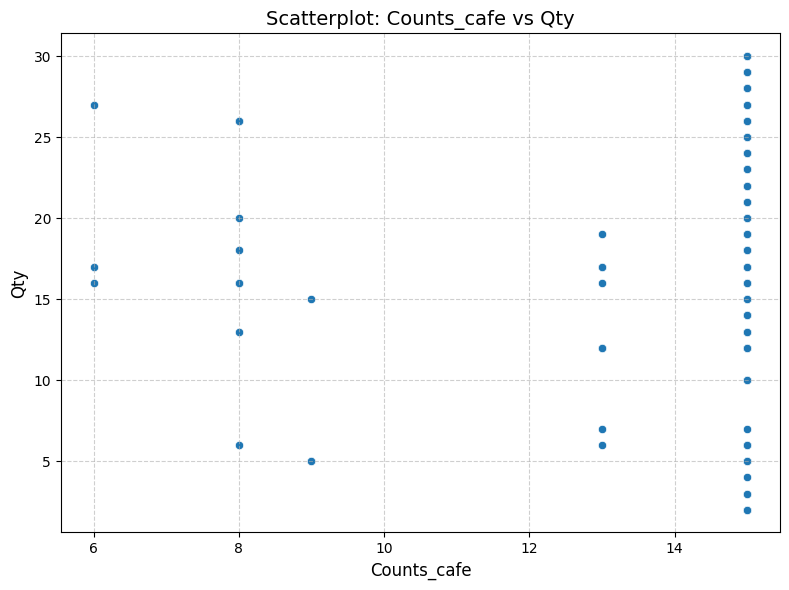

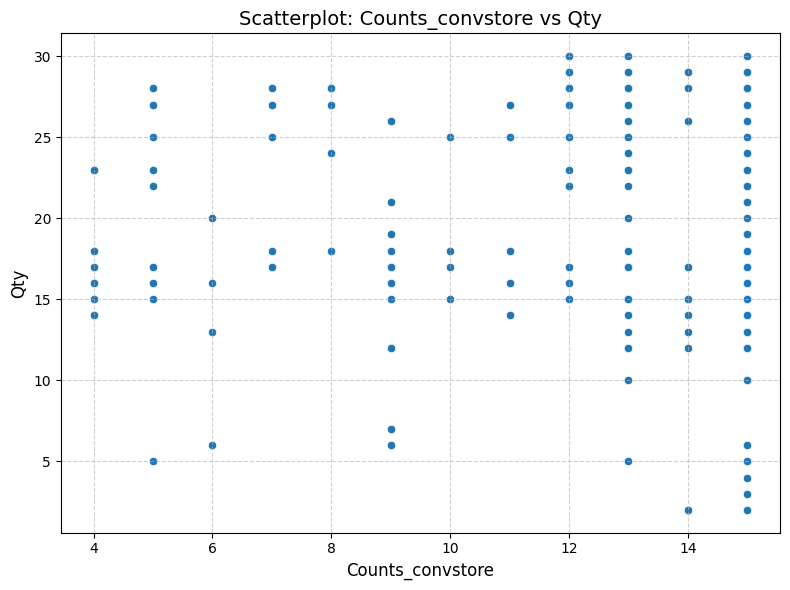

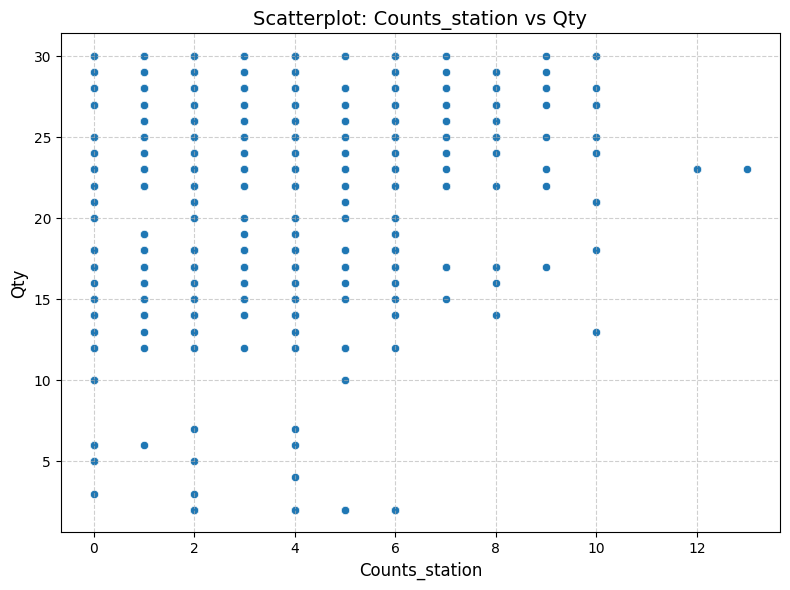

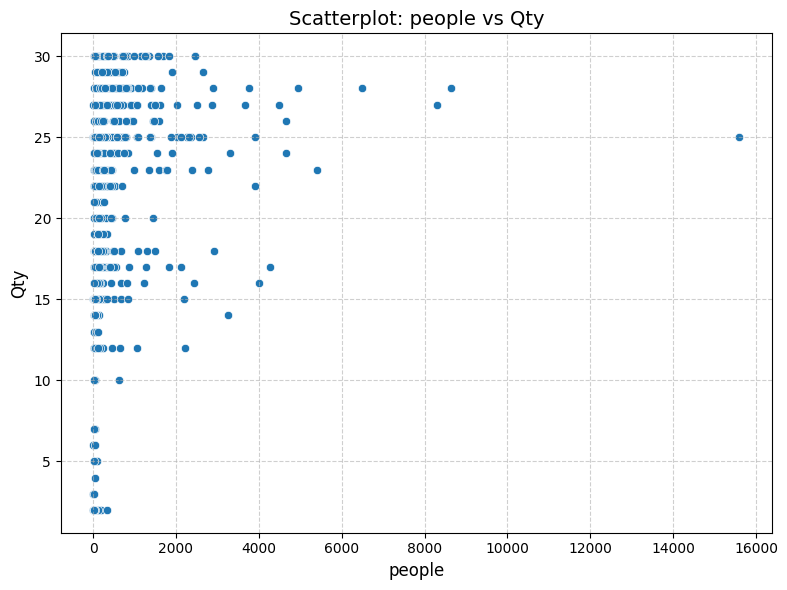

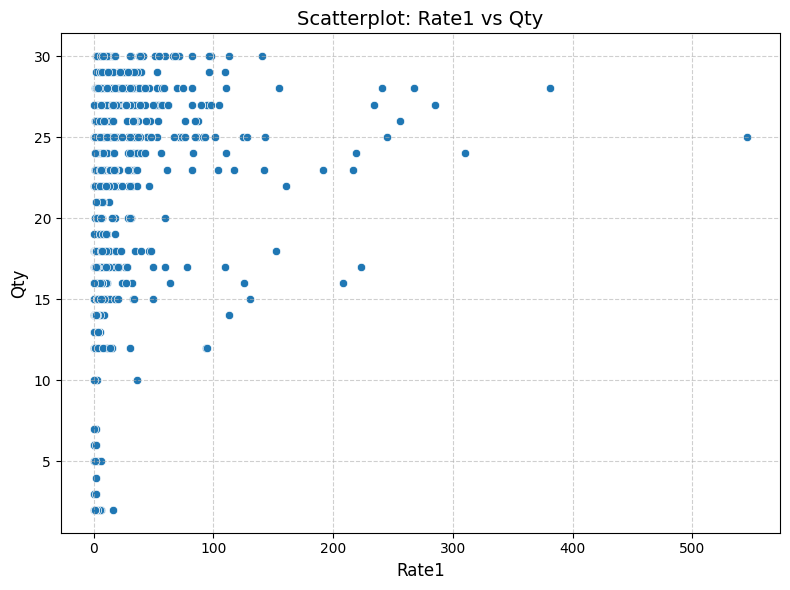

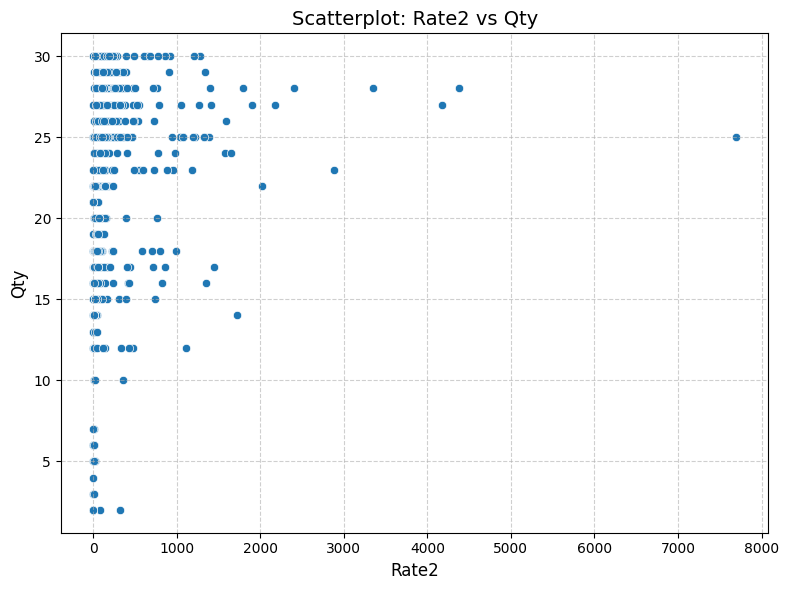

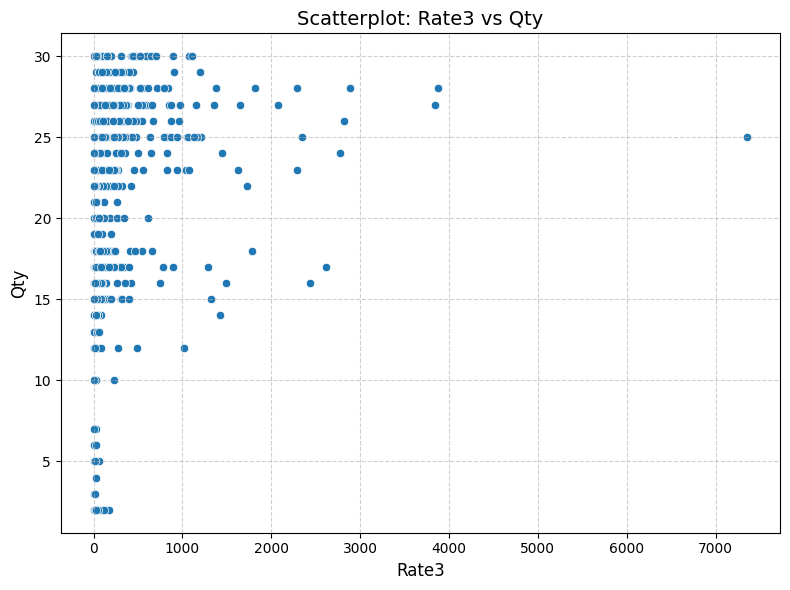

In [3]:
from scipy.stats import pearsonr

correlation_results = []
for column in numeric_df.columns:
    if column != 'Qty':
        corr, p_value = pearsonr(numeric_df[column], numeric_df['Qty'])
        correlation_results.append({'Feature': column, 'Correlation': corr, 'p-value': p_value})

correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)

for column in numeric_df.columns:
    if column != 'Qty':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numeric_df[column], y=numeric_df['Qty'])
        plt.title(f"Scatterplot: {column} vs Qty", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Qty', fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()
